In [210]:
import warnings
warnings.filterwarnings("ignore")

from data_name_lists import index, share_name, mutual_funds, mutual_funds_names
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's create first a combined csv of gold bonds

In [211]:
paths = ['../Data/Gold Bonds/SGBNOV258-GB-01-01-2019-to-01-01-2020.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2020-to-01-01-2021.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2021-to-01-01-2022.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2022-to-01-01-2023.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2023-to-01-01-2024.csv',
        '../Data/Gold Bonds/SGBNOV258-GB-01-01-2024-to-11-11-2024.csv',    
    ]

combined_df = pd.concat((pd.read_csv(path) for path in paths), ignore_index=True)

print(combined_df.head())
print(combined_df.tail())
# all_files = glob.glob(path + "/*.csv")
# all_files
combined_df.to_csv("../Data/Gold_Bonds.csv", index=False)

         Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  30-Dec-2019      GB  3,700.00  3,700.00  3,700.00     3,599.50  3,700.00   
1  23-Dec-2019      GB  3,750.00  3,750.00  3,599.00     3,589.00  3,599.00   
2  17-Dec-2019      GB  3,590.00  3,590.00  3,589.00     3,580.05  3,589.00   
3  16-Dec-2019      GB  3,580.05  3,580.05  3,580.05     3,580.00  3,580.05   
4  12-Dec-2019      GB  3,562.00  3,580.00  3,562.00     3,585.00  3,580.00   

     close      vwap     52W H     52W L  VOLUME        VALUE   No of trades   
0  3,700.00  3,700.00  3,840.00  2,725.00       6    22,200.00              1  
1  3,599.50  3,616.33  3,840.00  2,655.29      45  1,62,735.00              5  
2  3,589.00  3,589.40  3,840.00  2,655.29      25    89,735.00              3  
3  3,580.05  3,580.05  3,840.00  2,655.29       1     3,580.05              1  
4  3,580.00  3,565.00  3,840.00  2,655.29       6    21,390.00              2  
           Date  series      OPEN      HIGH  

### Storing all csv in dictionary. So, we don't need to read everytime

In [212]:
all_index = {}

for ind in index:
    file_name = '../Data/Index/' + ind.replace("^", "").replace(".NS", "") + '.csv'
    all_index[ind] = pd.read_csv(file_name)

In [213]:
all_index['^BSESN']

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,0.0,0.0
1,1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,0.0,0.0
2,1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,0.0,0.0
3,1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,0.0,0.0
4,1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,0.0,0.0
...,...,...,...,...,...,...,...,...
6803,2025-02-11 00:00:00+05:30,77384.976562,77387.281250,76030.593750,76293.601562,9800,0.0,0.0
6804,2025-02-12 00:00:00+05:30,76188.242188,76459.718750,75388.390625,76171.078125,10400,0.0,0.0
6805,2025-02-13 00:00:00+05:30,76201.101562,76764.531250,76013.429688,76138.968750,6900,0.0,0.0
6806,2025-02-14 00:00:00+05:30,76388.992188,76483.062500,75439.640625,75939.210938,9300,0.0,0.0


In [214]:
# all_nifty_50_stocks = {}

# for share in share_name:
#     file_name = '../Data/Stocks/' + share.replace(".NS", "") + '.csv'
#     all_nifty_50_stocks[share] = pd.read_csv(file_name)

In [215]:
all_mutual_funds = {}

for fund in mutual_funds:
    file_name = '../Data/Mutual Funds/' + fund.replace(".NS", "").replace(".BO", "") + '.csv'
    all_mutual_funds[fund] = pd.read_csv(file_name)

# 1. Data Cleaning

In [216]:
def check_missing_and_duplicates(stock_name, df):
    print(f'Name: {stock_name}')
    
    # Check for missing values
    missing_count = df.isnull().sum().sum()
    print(f'missing_count: {missing_count}')
    if missing_count > 0:
        print(f"{stock_name}: Missing values found - {missing_count} total missing")
        print("----------------------------------------------------------------")


    # Check for duplicate values
    duplicate_count = df.duplicated().sum()
    print(f'duplicate_count: {duplicate_count}')
    if duplicate_count > 0:
        print(f"{stock_name}: Duplicate values found - {duplicate_count} duplicates")
        print("----------------------------------------------------------------")
    
    print("----------------------------------------------------------------")

## Index

In [217]:
for ind in index:
    check_missing_and_duplicates(ind, all_index[ind])

Name: ^NSEI
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^NSEBANK
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^CNXIT
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^BSESN
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: NIFTY_MIDCAP_100.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^CNXPSUBANK
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: ^CNXAUTO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: NIFTY_FIN_SERVICE.NS
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------


## Stock data

In [218]:
# for share in share_name:
#     check_missing_and_duplicates(share, all_nifty_50_stocks[share])

## Mutual Funds

In [219]:
for fund in mutual_funds:
    check_missing_and_duplicates(fund, all_mutual_funds[fund])

Name: 0P00005WL6.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: UTINEXT50.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0000MLHH.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0000KV39.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P00009J3K.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0001BAB5.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0001EI18.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P0001BA1R.BO
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------
Name: 0P00005WEY.BO
missing_count

## FD Returns

In [220]:
fd_df = pd.read_csv('../Data/FD_Returns.csv')

check_missing_and_duplicates('F.D. Return', fd_df)

Name: F.D. Return
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------


## Gold Bonds

In [221]:
GB_df = pd.read_csv('../Data/Gold_Bonds.csv')

check_missing_and_duplicates('Gold Bonds', GB_df)

Name: Gold Bonds
missing_count: 0
duplicate_count: 10
Gold Bonds: Duplicate values found - 10 duplicates
----------------------------------------------------------------
----------------------------------------------------------------


In [222]:
len(GB_df[GB_df.duplicated()])

10

In [223]:
GB_df[GB_df.duplicated()]

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
197,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
198,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
199,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
200,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
201,03-Mar-2020,GB,"3,950.00","3,960.00","3,950.00","3,900.00","3,960.00","3,960.00","3,957.50","4,070.00","2,861.00",4,"15,830.00",2
209,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
210,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
211,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
212,19-Feb-2020,GB,"3,890.00","3,890.00","3,810.00","3,890.00","3,810.00","3,814.25","3,826.43","4,070.00","2,725.00",56,"2,14,280.00",4
343,01-Jan-2021,GB,"4,860.00","4,933.99","4,860.00","4,935.17","4,933.99","4,933.99","4,912.11","5,399.00","3,615.00",74,"3,63,495.90",15


In [224]:
GB_df_cleaned = GB_df.drop_duplicates()

In [225]:
check_missing_and_duplicates('Gold Bonds', GB_df_cleaned)

Name: Gold Bonds
missing_count: 0
duplicate_count: 0
----------------------------------------------------------------


In [226]:
# Removing extra space after each column
GB_df_cleaned.columns = GB_df_cleaned.columns.str.strip()

# 2. Feature Engineering

In [ ]:
for ind in index:
    all_index[ind]['Percent change in price'] = all_index[ind].Close.pct_change()
    all_index[ind]['Momentum_Indicator'] = (all_index[ind]['Close'] - all_index[ind]['Open']) / all_index[ind]['Open']
    all_index[ind]['High_Low_Change'] = (all_index[ind]['High'] - all_index[ind]['Low']) / all_index[ind]['Low']
    all_index[ind]['High_Open_Change'] = (all_index[ind]['High'] - all_index[ind]['Open']) / all_index[ind]['Open']
    all_index[ind]['Low_Open_Change'] = (all_index[ind]['Low'] - all_index[ind]['Open']) / all_index[ind]['Open']

    all_index[ind]['Date'] = pd.to_datetime(all_index[ind]['Date'])

    all_index[ind]['Day'] = all_index[ind]['Date'].dt.day
    all_index[ind]['Month'] = all_index[ind]['Date'].dt.month
    all_index[ind]['Year'] = all_index[ind]['Date'].dt.year

    all_index[ind]['Date'] = all_index[ind]['Date'].astype(str)

In [228]:
all_index['^CNXIT']

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percent change in price,Momentum_Indicator,High_Low_Change,High_Open_Change,Low_Open_Change,Day,Month,Year
0,2007-09-17 00:00:00+05:30,4645.850098,4673.250000,4562.700195,4573.549805,0,0.0,0.0,NaN,-0.015562,0.024229,0.005898,-0.017898,17,9,2007
1,2007-09-18 00:00:00+05:30,4577.700195,4593.350098,4558.600098,4576.750000,0,0.0,0.0,0.000700,-0.000208,0.007623,0.003419,-0.004172,18,9,2007
2,2007-09-19 00:00:00+05:30,4674.100098,4700.750000,4650.250000,4667.299805,0,0.0,0.0,0.019785,-0.001455,0.010860,0.005702,-0.005103,19,9,2007
3,2007-09-20 00:00:00+05:30,4666.000000,4666.000000,4558.200195,4566.049805,0,0.0,0.0,-0.021693,-0.021421,0.023650,0.000000,-0.023103,20,9,2007
4,2007-09-21 00:00:00+05:30,4559.149902,4632.100098,4476.850098,4603.850098,0,0.0,0.0,0.008279,0.009805,0.034678,0.016001,-0.018052,21,9,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,2025-02-11 00:00:00+05:30,42616.898438,42790.250000,41866.601562,41968.300781,21500,0.0,0.0,-0.014749,-0.015219,0.022062,0.004068,-0.017606,11,2,2025
3979,2025-02-12 00:00:00+05:30,42039.500000,42263.050781,41591.199219,41733.000000,23600,0.0,0.0,-0.005607,-0.007291,0.016154,0.005318,-0.010664,12,2,2025
3980,2025-02-13 00:00:00+05:30,41787.000000,41944.699219,41182.398438,41315.550781,21300,0.0,0.0,-0.010003,-0.011282,0.018510,0.003774,-0.014469,13,2,2025
3981,2025-02-14 00:00:00+05:30,41547.050781,41606.750000,40958.000000,41311.148438,18600,0.0,0.0,-0.000107,-0.005678,0.015839,0.001437,-0.014178,14,2,2025


In [229]:
# for share in share_name:
#     all_nifty_50_stocks[share]['Percent change in price'] = all_nifty_50_stocks[share].Close.pct_change()
#     all_nifty_50_stocks[share]['Percent change in volume'] = all_nifty_50_stocks[share].Volume.pct_change()

In [ ]:
for fund in mutual_funds:
    all_mutual_funds[fund]['Percent change in price'] = all_mutual_funds[fund].Close.pct_change()
    all_mutual_funds[fund]['Momentum_Indicator'] = (all_mutual_funds[fund]['Close'] - all_mutual_funds[fund]['Open']) / all_mutual_funds[fund]['Open']
    all_mutual_funds[fund]['High_Low_Change'] = (all_mutual_funds[fund]['High'] - all_mutual_funds[fund]['Low']) / all_mutual_funds[fund]['Low']
    all_mutual_funds[fund]['High_Open_Change'] = (all_mutual_funds[fund]['High'] - all_mutual_funds[fund]['Open']) / all_mutual_funds[fund]['Open']
    all_mutual_funds[fund]['Low_Open_Change'] = (all_mutual_funds[fund]['Low'] - all_mutual_funds[fund]['Open']) / all_mutual_funds[fund]['Open']

    all_mutual_funds[fund]['Date'] = pd.to_datetime(all_mutual_funds[fund]['Date'])

    all_mutual_funds[fund]['Day'] = all_mutual_funds[fund]['Date'].dt.day
    all_mutual_funds[fund]['Month'] = all_mutual_funds[fund]['Date'].dt.month
    all_mutual_funds[fund]['Year'] = all_mutual_funds[fund]['Date'].dt.year

    all_mutual_funds[fund]['Date'] = all_mutual_funds[fund]['Date'].astype(str)

In [ ]:
GB_df_cleaned['Date'] = pd.to_datetime(GB_df_cleaned['Date'])

GB_df_cleaned['Day'] = GB_df_cleaned['Date'].dt.day
GB_df_cleaned['Month'] = GB_df_cleaned['Date'].dt.month
GB_df_cleaned['Year'] = GB_df_cleaned['Date'].dt.year

GB_df_cleaned['Date'] = GB_df_cleaned['Date'].astype(str)

# 3. Basic Statistical Summary

## Index

In [232]:
index_name = '^NSEBANK'
df = all_index[index_name]

print(f"\nInfo for {index_name}:")
print(df.info())
print(f"\nDescription for {index_name}:")
display(df.describe())


Info for ^NSEBANK:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     3998 non-null   object 
 1   Open                     3998 non-null   float64
 2   High                     3998 non-null   float64
 3   Low                      3998 non-null   float64
 4   Close                    3998 non-null   float64
 5   Volume                   3998 non-null   int64  
 6   Dividends                3998 non-null   float64
 7   Stock Splits             3998 non-null   float64
 8   Percent change in price  3997 non-null   float64
 9   Momentum_Indicator       3998 non-null   float64
 10  High_Low_Change          3998 non-null   float64
 11  High_Open_Change         3998 non-null   float64
 12  Low_Open_Change          3998 non-null   float64
 13  Day                      3998 non-null   int32  
 14  Mont

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percent change in price,Momentum_Indicator,High_Low_Change,High_Open_Change,Low_Open_Change,Day,Month,Year
count,3998.000000,3998.000000,3998.000000,3998.000000,3.998000e+03,3998.0,3998.0,3997.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,22447.481715,22619.472609,22246.218775,22434.265284,6.333428e+05,0.0,0.0,0.000662,-0.000488,0.020333,0.009398,-0.010591,15.818909,6.525263,2015.935218
std,13623.517955,13686.294933,13546.338507,13617.275467,2.879268e+07,0.0,0.0,0.018484,0.015507,0.015483,0.011009,0.011889,8.744374,3.466807,5.207004
min,3385.360435,3446.709937,3314.511523,3339.661133,0.000000e+00,0.0,0.0,-0.167340,-0.096369,0.000000,0.000000,-0.144876,1.000000,1.000000,2007.000000
25%,10445.691076,10546.452706,10340.342609,10438.854004,0.000000e+00,0.0,0.0,-0.007527,-0.007585,0.010718,0.002448,-0.013904,8.000000,3.000000,2011.000000
50%,19089.303539,19224.176140,18850.706379,19060.154297,0.000000e+00,0.0,0.0,0.000763,-0.000468,0.015783,0.006060,-0.007142,16.000000,7.000000,2016.000000
75%,32280.937798,32442.509870,32037.214828,32245.788086,1.159750e+05,0.0,0.0,0.008786,0.006544,0.024633,0.012338,-0.003177,23.000000,10.000000,2021.000000
max,54338.699219,54467.351562,54010.898438,54375.351562,1.798102e+09,0.0,0.0,0.194376,0.107642,0.202281,0.129837,0.000000,31.000000,12.000000,2025.000000


## Stock data

In [233]:
# for stock_name in ['ONGC.NS', 'RELIANCE.NS']:
#     stock_df = all_nifty_50_stocks[stock_name]
#     print(f"\nInfo for {stock_name}:")
#     print(stock_df.info())
#     print(f"\nDescription for {stock_name}:")
#     display(stock_df.describe())

## Mutual Funds

In [234]:
for mf_name in ['0P0001EI18.BO', '0P0000XUYS.BO']:
    mf_df = all_mutual_funds[mf_name]
    print(f"\nInfo for {mf_name}:")
    print(mf_df.info())
    print(f"\nDescription for {mf_name}:")
    display(mf_df.describe())


Info for 0P0001EI18.BO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1753 non-null   object 
 1   Open                     1753 non-null   float64
 2   High                     1753 non-null   float64
 3   Low                      1753 non-null   float64
 4   Close                    1753 non-null   float64
 5   Volume                   1753 non-null   int64  
 6   Dividends                1753 non-null   float64
 7   Stock Splits             1753 non-null   float64
 8   Capital Gains            1753 non-null   float64
 9   Percent change in price  1752 non-null   float64
 10  Momentum_Indicator       1753 non-null   float64
 11  High_Low_Change          1753 non-null   float64
 12  High_Open_Change         1753 non-null   float64
 13  Low_Open_Change          1753 non-null   float64
 14 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent change in price,Momentum_Indicator,High_Low_Change,High_Open_Change,Low_Open_Change,Day,Month,Year
count,1753.000000,1753.000000,1753.000000,1753.000000,1753.0,1753.0,1753.0,1753.0,1752.000000,1753.0,1753.0,1753.0,1753.0,1753.00000,1753.000000,1753.000000
mean,78.130700,78.130700,78.130700,78.130700,0.0,0.0,0.0,0.0,0.000477,0.0,0.0,0.0,0.0,15.72105,6.411865,2021.075870
std,24.088372,24.088372,24.088372,24.088372,0.0,0.0,0.0,0.0,0.007973,0.0,0.0,0.0,0.0,8.78545,3.491725,2.050853
min,41.063000,41.063000,41.063000,41.063000,0.0,0.0,0.0,0.0,-0.091727,0.0,0.0,0.0,0.0,1.00000,1.000000,2018.000000
25%,54.948002,54.948002,54.948002,54.948002,0.0,0.0,0.0,0.0,-0.003203,0.0,0.0,0.0,0.0,8.00000,3.000000,2019.000000
50%,78.616997,78.616997,78.616997,78.616997,0.0,0.0,0.0,0.0,0.000752,0.0,0.0,0.0,0.0,16.00000,6.000000,2021.000000
75%,94.295998,94.295998,94.295998,94.295998,0.0,0.0,0.0,0.0,0.004676,0.0,0.0,0.0,0.0,23.00000,9.000000,2023.000000
max,128.026001,128.026001,128.026001,128.026001,0.0,0.0,0.0,0.0,0.047905,0.0,0.0,0.0,0.0,31.00000,12.000000,2025.000000



Info for 0P0000XUYS.BO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1753 non-null   object 
 1   Open                     1753 non-null   float64
 2   High                     1753 non-null   float64
 3   Low                      1753 non-null   float64
 4   Close                    1753 non-null   float64
 5   Volume                   1753 non-null   int64  
 6   Dividends                1753 non-null   float64
 7   Stock Splits             1753 non-null   float64
 8   Capital Gains            1753 non-null   float64
 9   Percent change in price  1752 non-null   float64
 10  Momentum_Indicator       1753 non-null   float64
 11  High_Low_Change          1753 non-null   float64
 12  High_Open_Change         1753 non-null   float64
 13  Low_Open_Change          1753 non-null   float64
 14 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Percent change in price,Momentum_Indicator,High_Low_Change,High_Open_Change,Low_Open_Change,Day,Month,Year
count,1753.000000,1753.000000,1753.000000,1753.000000,1753.0,1753.0,1753.0,1753.0,1752.000000,1753.0,1753.0,1753.0,1753.0,1753.00000,1753.000000,1753.000000
mean,36.179770,36.179770,36.179770,36.179770,0.0,0.0,0.0,0.0,0.000459,0.0,0.0,0.0,0.0,15.72105,6.411865,2021.075870
std,13.004292,13.004292,13.004292,13.004292,0.0,0.0,0.0,0.0,0.011868,0.0,0.0,0.0,0.0,8.78545,3.491725,2.050853
min,16.951799,16.951799,16.951799,16.951799,0.0,0.0,0.0,0.0,-0.114761,0.0,0.0,0.0,0.0,1.00000,1.000000,2018.000000
25%,25.536800,25.536800,25.536800,25.536800,0.0,0.0,0.0,0.0,-0.005101,0.0,0.0,0.0,0.0,8.00000,3.000000,2019.000000
50%,34.696701,34.696701,34.696701,34.696701,0.0,0.0,0.0,0.0,0.001636,0.0,0.0,0.0,0.0,16.00000,6.000000,2021.000000
75%,40.158100,40.158100,40.158100,40.158100,0.0,0.0,0.0,0.0,0.007082,0.0,0.0,0.0,0.0,23.00000,9.000000,2023.000000
max,71.898102,71.898102,71.898102,71.898102,0.0,0.0,0.0,0.0,0.063372,0.0,0.0,0.0,0.0,31.00000,12.000000,2025.000000


## FD Returns

In [235]:
fd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Bank Name                            8 non-null      object 
 1   Return Rate for Adults (%)           8 non-null      float64
 2   Return Rate for Senior Citizens (%)  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [236]:
fd_df.describe()

,Return Rate for Adults (%),Return Rate for Senior Citizens (%)
count,8.000000,8.000000
mean,6.837500,7.300000
std,0.204852,0.198206
min,6.600000,7.100000
25%,6.700000,7.200000
50%,6.800000,7.250000
75%,6.887500,7.312500
max,7.250000,7.750000


## Gold Bonds

In [237]:
GB_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          683 non-null    object
 1   series        683 non-null    object
 2   OPEN          683 non-null    object
 3   HIGH          683 non-null    object
 4   LOW           683 non-null    object
 5   PREV. CLOSE   683 non-null    object
 6   ltp           683 non-null    object
 7   close         683 non-null    object
 8   vwap          683 non-null    object
 9   52W H         683 non-null    object
 10  52W L         683 non-null    object
 11  VOLUME        683 non-null    object
 12  VALUE         683 non-null    object
 13  No of trades  683 non-null    int64 
 14  Day           683 non-null    int32 
 15  Month         683 non-null    int32 
 16  Year          683 non-null    int32 
dtypes: int32(3), int64(1), object(13)
memory usage: 88.0+ KB


In [238]:
GB_df_cleaned['Date'] = pd.to_datetime(GB_df_cleaned['Date'])

numeric_columns = ["OPEN", "HIGH", "LOW", "PREV. CLOSE", "ltp", "close", 
                   "vwap", "52W H", "52W L", "VOLUME", "VALUE"]

for col in numeric_columns:
    GB_df_cleaned[col] = pd.to_numeric(GB_df_cleaned[col].str.replace(',', ''), errors='coerce')

In [239]:
GB_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          683 non-null    datetime64[ns]
 1   series        683 non-null    object        
 2   OPEN          683 non-null    float64       
 3   HIGH          683 non-null    float64       
 4   LOW           683 non-null    float64       
 5   PREV. CLOSE   683 non-null    float64       
 6   ltp           683 non-null    float64       
 7   close         683 non-null    float64       
 8   vwap          683 non-null    float64       
 9   52W H         683 non-null    float64       
 10  52W L         683 non-null    float64       
 11  VOLUME        683 non-null    int64         
 12  VALUE         683 non-null    float64       
 13  No of trades  683 non-null    int64         
 14  Day           683 non-null    int32         
 15  Month         683 non-null    int32         


In [240]:
GB_df_cleaned.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,683,2022-01-18 16:26:42.342606080,2019-01-03 00:00:00,2020-09-11 00:00:00,2022-01-20 00:00:00,2023-05-30 12:00:00,2024-11-07 00:00:00,NaN
OPEN,683.0,5154.303177,2751.25,4655.0,4901.0,5874.645,8200.0,1149.568517
HIGH,683.0,5172.663075,2751.25,4670.0,4920.0,5880.0,8236.0,1152.886668
LOW,683.0,5143.626457,2725.0,4650.0,4900.0,5870.5,8200.0,1150.33437
PREV. CLOSE,683.0,5154.649253,2751.25,4654.5,4910.0,5873.995,8235.5,1151.614367
ltp,683.0,5162.591977,2751.25,4655.025,4910.0,5874.145,8235.0,1153.28967
close,683.0,5162.438419,2751.25,4655.025,4910.0,5874.145,8235.5,1153.519266
vwap,683.0,5158.348433,2751.25,4654.005,4905.0,5873.995,8221.2,1151.194181
52W H,683.0,5421.509151,3100.0,4977.0,5399.0,6100.01,8236.0,1117.569682
52W L,683.0,4215.587306,2511.29,3428.0,4550.01,4851.0,6000.0,1032.675571


In [ ]:
GB_df_cleaned['Percent change in price'] = GB_df_cleaned.close.pct_change()
GB_df_cleaned['Momentum_Indicator'] = (GB_df_cleaned['close'] - GB_df_cleaned['OPEN']) / GB_df_cleaned['OPEN']
GB_df_cleaned['High_Low_Change'] = (GB_df_cleaned['HIGH'] - GB_df_cleaned['LOW']) / GB_df_cleaned['LOW']
GB_df_cleaned['High_Open_Change'] = (GB_df_cleaned['HIGH'] - GB_df_cleaned['OPEN']) / GB_df_cleaned['OPEN']
GB_df_cleaned['Low_Open_Change'] = (GB_df_cleaned['LOW'] - GB_df_cleaned['OPEN']) / GB_df_cleaned['OPEN']

# 4. Exploratory Data Analysis (EDA)

In [242]:
def histogram_plot(df, col_name, asset):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col_name], kde=True, bins=20)
    plt.title(f'Histogram of {asset} {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

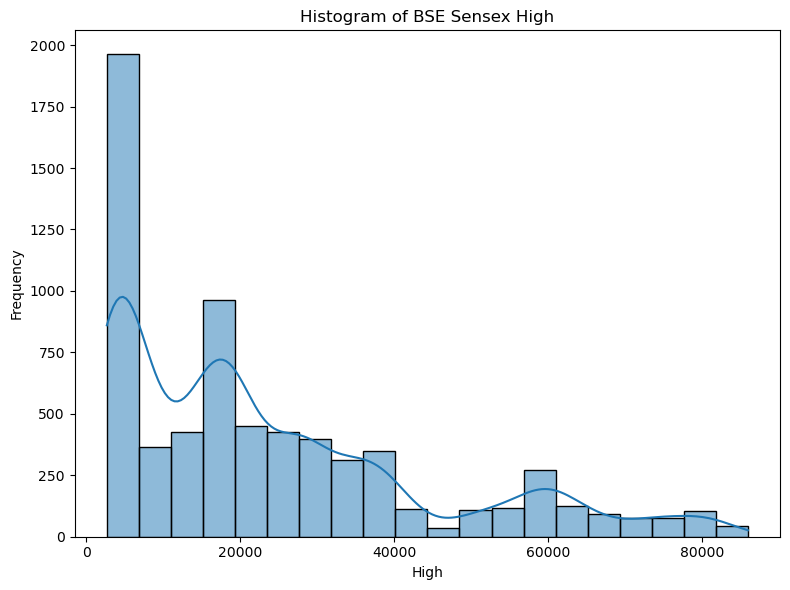

In [243]:
histogram_plot(all_index['^BSESN'], 'High', 'BSE Sensex')

In [244]:
# histogram_plot(all_nifty_50_stocks['SBIN.NS'], 'Open', 'SBIN')

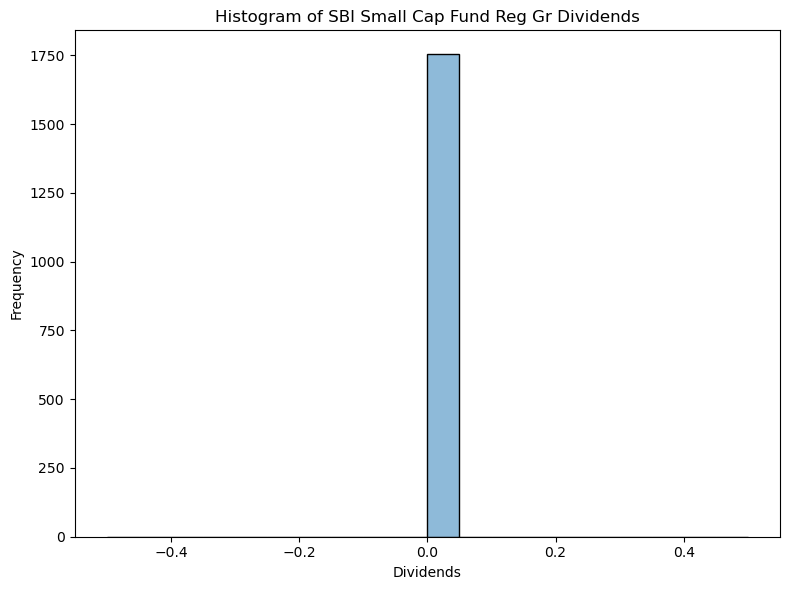

In [245]:
histogram_plot(all_mutual_funds['0P0000KV39.BO'], 'Dividends', 'SBI Small Cap Fund Reg Gr')

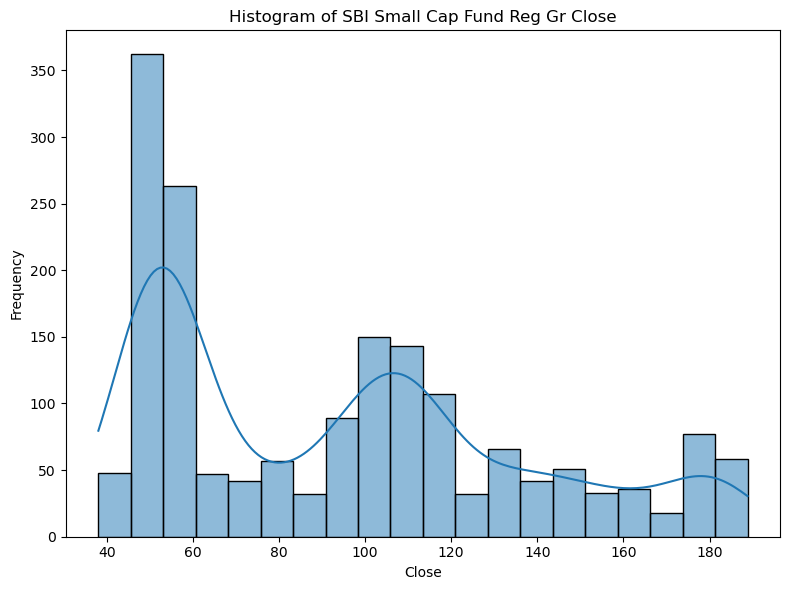

In [246]:
histogram_plot(all_mutual_funds['0P0000KV39.BO'], 'Close', 'SBI Small Cap Fund Reg Gr')

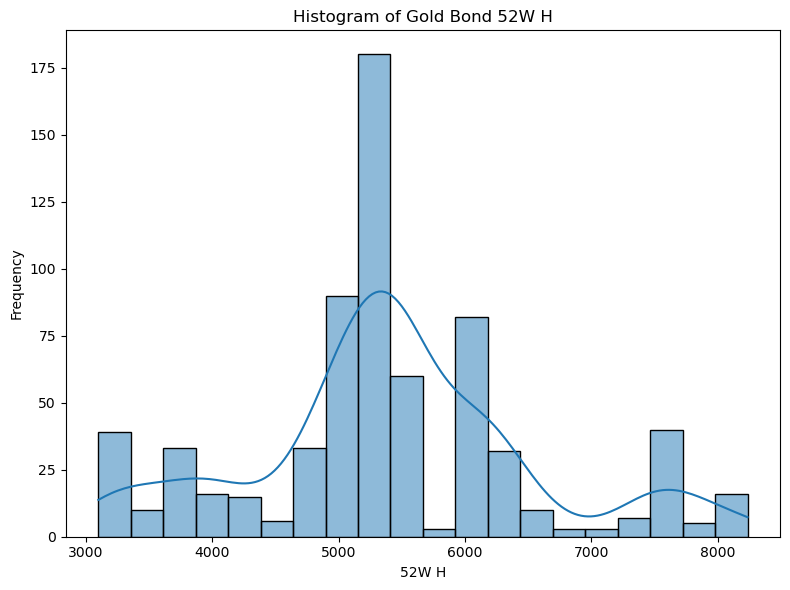

In [247]:
histogram_plot(GB_df_cleaned, '52W H', 'Gold Bond')

In [248]:
def scatter_plot(df, col_name1, col_name2, asset):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col_name1], df[col_name2], alpha=0.7, color='orange')
    plt.title(f'Scatter plot of {col_name1} and {col_name2} of {asset}')
    plt.xlabel(col_name1)
    plt.ylabel(col_name2)
    plt.tight_layout()
    plt.show()

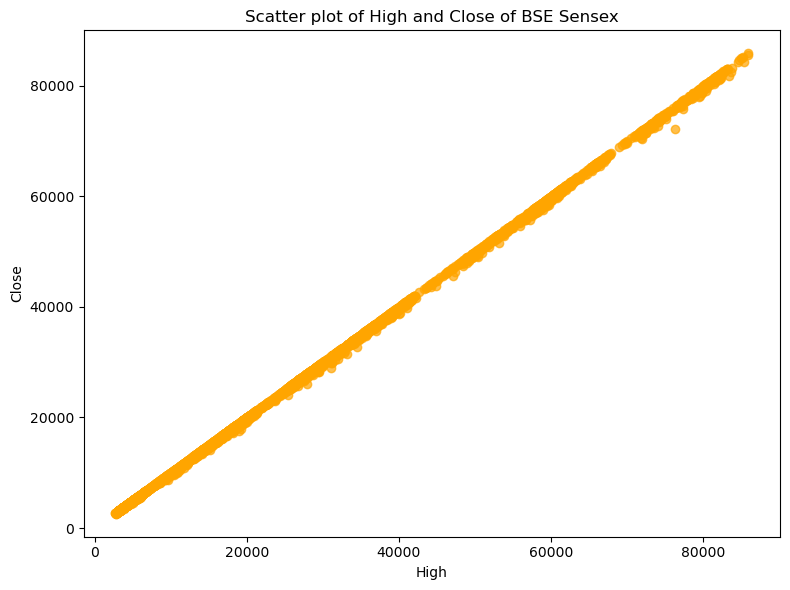

In [249]:
scatter_plot(all_index['^BSESN'], 'High', 'Close', 'BSE Sensex')

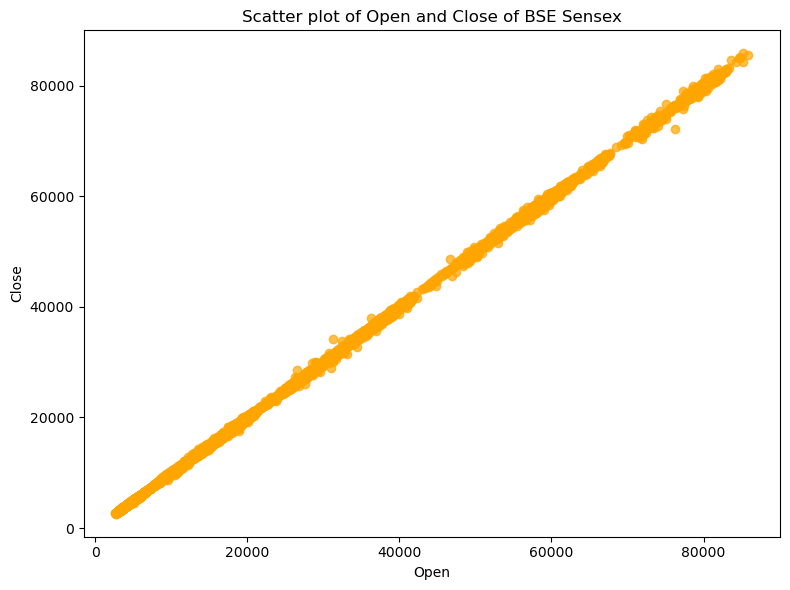

In [250]:
scatter_plot(all_index['^BSESN'], 'Open', 'Close', 'BSE Sensex')

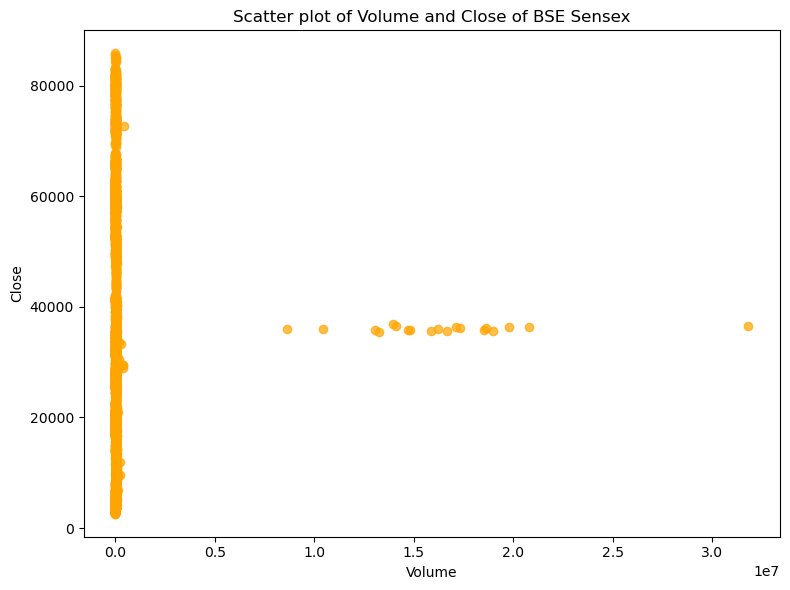

In [251]:
scatter_plot(all_index['^BSESN'], 'Volume', 'Close', 'BSE Sensex')

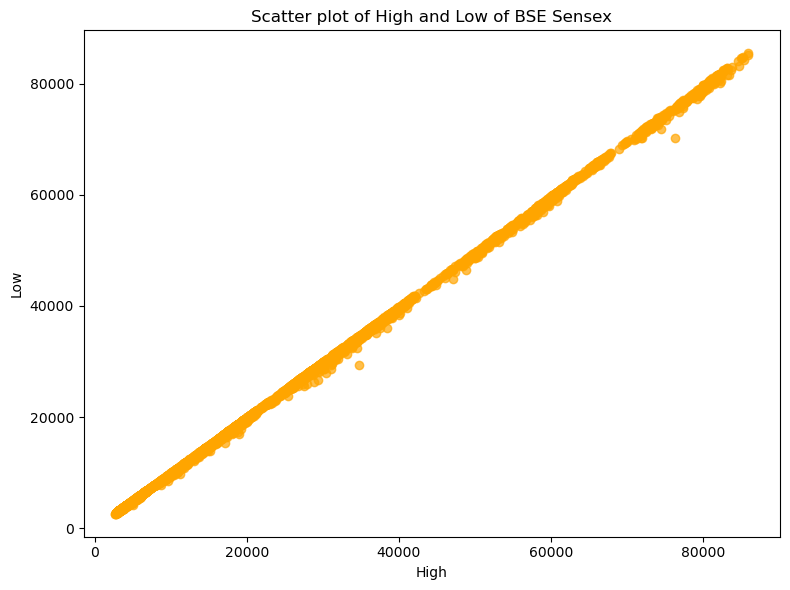

In [252]:
scatter_plot(all_index['^BSESN'], 'High', 'Low', 'BSE Sensex')

In [253]:
# scatter_plot(all_nifty_50_stocks['SBIN.NS'], 'Volume', 'Close', 'SBIN')

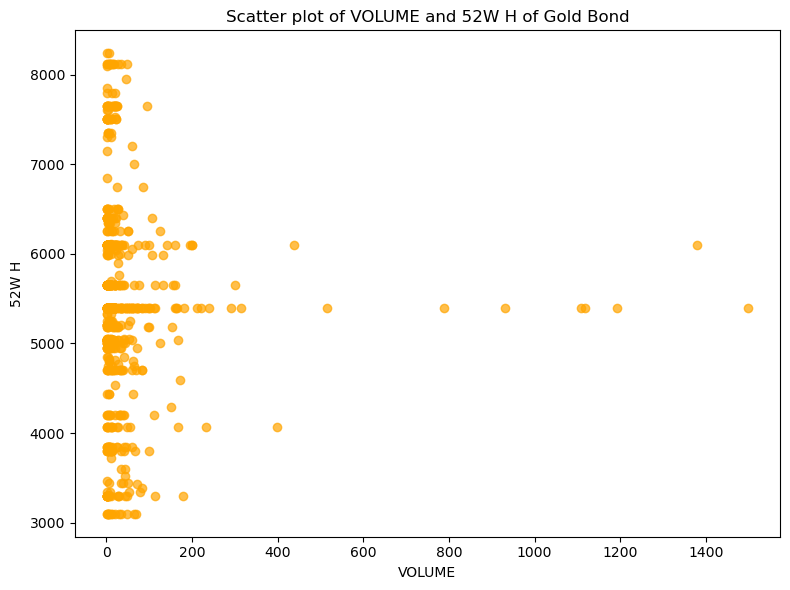

In [254]:
scatter_plot(GB_df_cleaned, 'VOLUME', '52W H', 'Gold Bond')

In [255]:
def correlation_matrix_plot(df, asset):
    correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.9, fmt=".2f")
    plt.title(f'Correlation Matrix of {asset}')
    plt.tight_layout()
    plt.show()

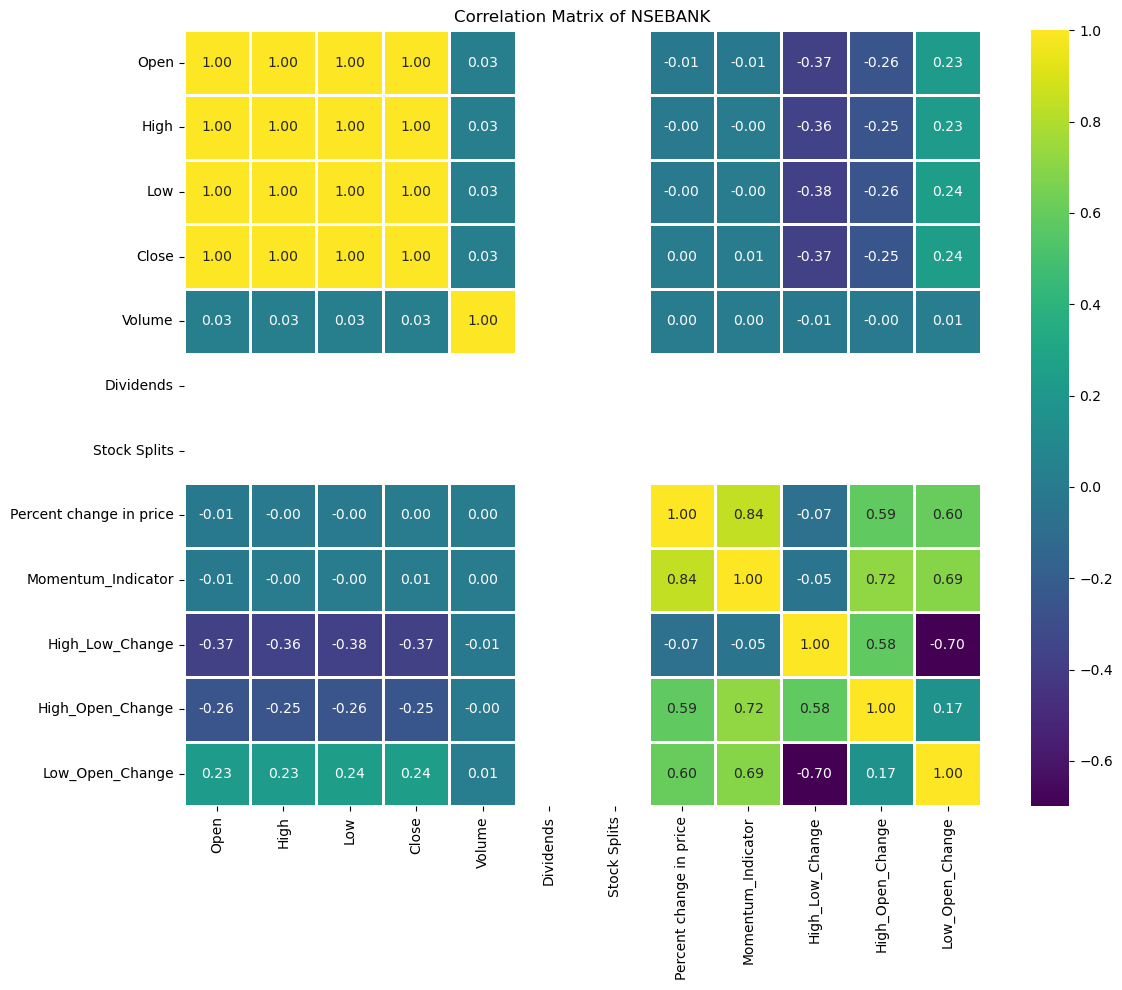

In [256]:
correlation_matrix_plot(all_index['^NSEBANK'], 'NSEBANK')

In [257]:
# correlation_matrix_plot(all_nifty_50_stocks['RELIANCE.NS'], 'RELIANCE.NS')

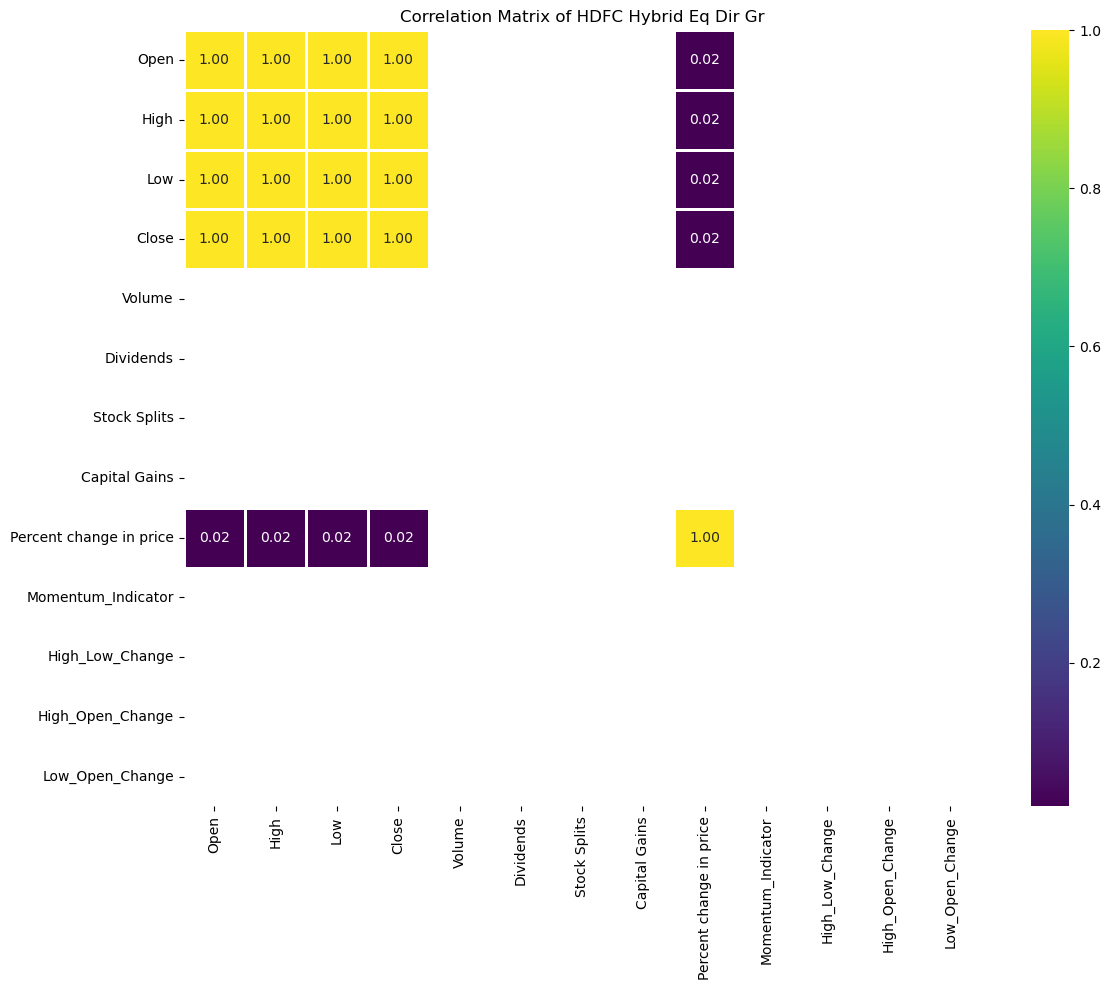

In [258]:
correlation_matrix_plot(all_mutual_funds['0P0001EI18.BO'], 'HDFC Hybrid Eq Dir Gr')

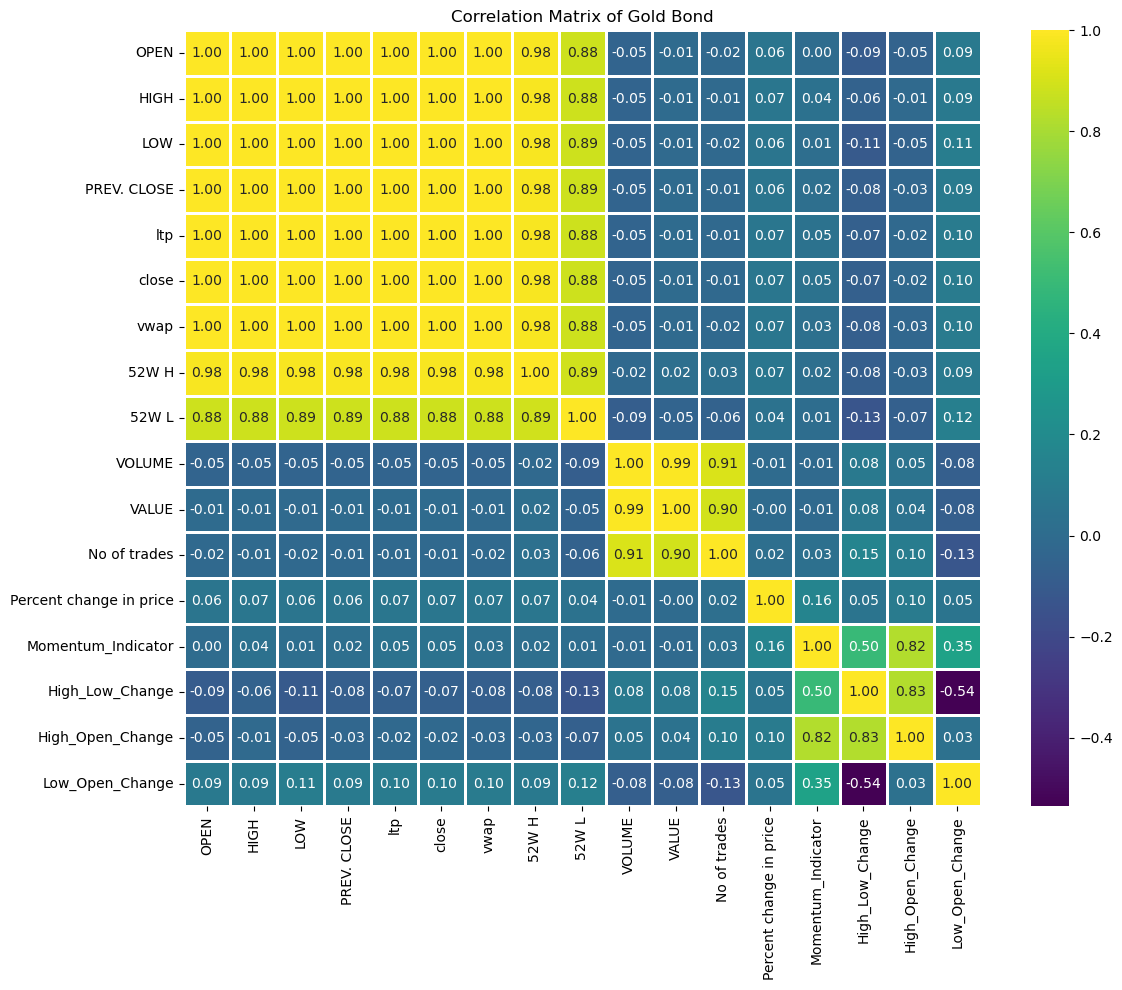

In [259]:
correlation_matrix_plot(GB_df_cleaned, 'Gold Bond')

# Create Excel file

In [260]:
index_excel_file = '../Data/Index_Data.xlsx'

with pd.ExcelWriter(index_excel_file) as writer:
    for ind, df in all_index.items():
        sheet_name = ind.replace("^", "").replace(".NS", "")
        df.columns = [col.replace(' ', '_').replace('.', '').title() for col in df.columns]
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [261]:
# stocks_excel_file = '../Data/Stocks_Data.xlsx'

# with pd.ExcelWriter(stocks_excel_file) as writer:
#     for share, df in all_nifty_50_stocks.items():
#         sheet_name = share.replace(".NS", "")
#         df.columns = [col.replace(' ', '_').replace('.', '').title() for col in df.columns]
#         df.to_excel(writer, sheet_name=sheet_name, index=False)

In [262]:
mutual_funds_excel_file = '../Data/Mutual_Funds_Data.xlsx'

with pd.ExcelWriter(mutual_funds_excel_file) as writer:
    for fund, df in all_mutual_funds.items():
        sheet_name = fund.replace(".NS", "").replace(".BO", "")
        df.columns = [col.replace(' ', '_').replace('.', '').title() for col in df.columns]
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [263]:
GB_df_cleaned.columns = [col.replace(' ', '_').replace('.', '').title() for col in GB_df_cleaned.columns]

GB_df_cleaned.to_csv('../Data/Gold_Bonds.csv', index=False)
GB_df_cleaned.to_excel('../Data/Gold_Bond_Data.xlsx', sheet_name='Gold Bond', index=False)

fd_df.to_csv('../Data/FD_Returns.csv', index=False)
fd_df.to_excel('../Data/FD_Return_Data.xlsx', sheet_name='FD Return', index=False)